In [48]:
# Titanic EDA - Task 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Kaggle / Seaborn)
df = sns.load_dataset("titanic")

# Preview dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
# Fill missing Age values with median
df['age'] = df['age'].fillna(df['age'].median())

# Drop rows with missing embarked values
df.dropna(subset=['embarked'], inplace=True)

# Check again
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [50]:
# Create Age Groups
df['AgeGroup'] = pd.cut(
    df['age'],
    bins=[0, 12, 20, 40, 60, 80],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)

df[['age', 'AgeGroup']].head()

,age,AgeGroup
0,22.0,Young Adult
1,38.0,Young Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


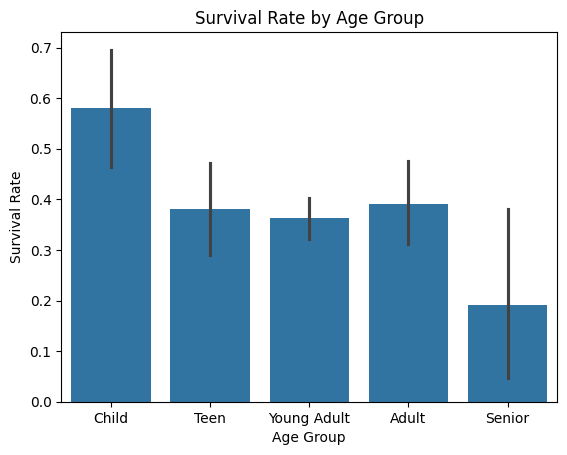

In [51]:
sns.barplot(x='AgeGroup', y='survived', data=df)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

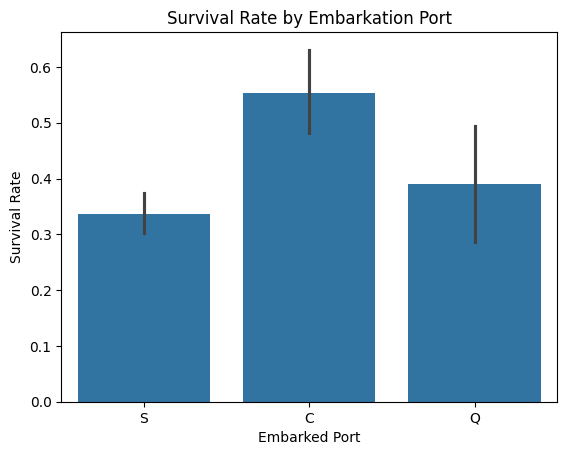

In [52]:
sns.barplot(x='embarked', y='survived', data=df)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate")
plt.show()

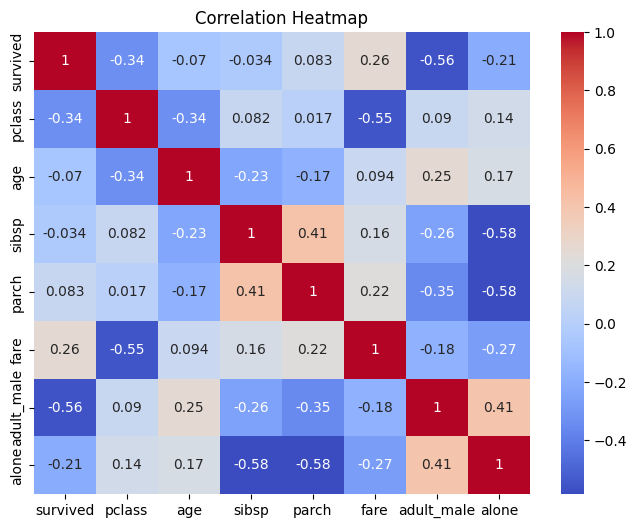

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

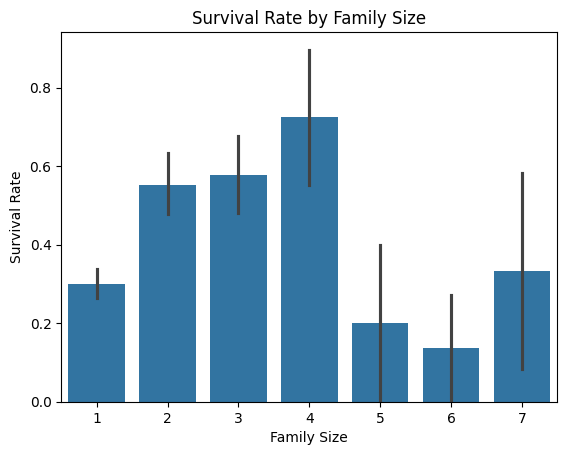

In [54]:
df['FamilySize'] = df['sibsp'] + df['parch'] + 1
df_filtered = df[df['FamilySize'] <= 7]

sns.barplot(x='FamilySize', y='survived', data=df_filtered)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

### 📌 **Objective**
The objective of this task is to perform Exploratory Data Analysis (EDA) on the Titanic dataset
to understand survival patterns based on age group, embarkation port, and family size.
The task also focuses on handling missing values and creating new features for deeper analysis.

### 🧹 **Data** **Cleaning**
- Missing values in the **Age** column were filled using the median value.
- Rows with missing **Embarked** values were removed.
- The dataset was checked again to ensure no critical missing values remained.

### 🧠 **Feature** **Engineering**
- **AgeGroup** feature was created by categorizing passengers into groups:
- Child, Teen, Young Adult, Adult, Senior
- **FamilySize** feature was created using:
- FamilySize = SibSp + Parch + 1


### 📊 **Exploratory** **Data** **Analysis**
The following analyses were performed:
- Survival rate comparison across different **Age Groups**
- Survival rate analysis based on **Embarkation Port**
- Correlation analysis using a **heatmap**
- Survival rate analysis based on **Family Size**


### 📈 **Visualizations**
- Bar chart showing survival rate by age group
- Bar chart showing survival rate by embarkation port
- Correlation heatmap of numerical features
- Bar chart showing survival rate by family size


### ✅ **Key** **Insights**
- Children and young adults showed higher survival rates compared to seniors.
- Survival chances varied based on the embarkation port.
- Passengers with small to medium family sizes had better survival rates.
- Passenger class, fare, and survival showed meaningful correlations.

### 🏁 **Conclusion**
Exploratory Data Analysis helped uncover important patterns in the Titanic dataset.
Age, embarkation port, and family size played a significant role in survival outcomes.
EDA and visualization techniques are essential for understanding real-world datasets
and extracting meaningful insights.